**THERE IS A WAY TO FIND OUT SPAM**

With the rapid development of internet technology, many people use email and other modes to share information. The increase in email usage also leads to a rise in spam data.

**What is spam?**

It is a message received by a group of people who are not the intended recipients, leading to various drawbacks such as wasting time, reducing network bandwidth, and increasing traffic.

The **necessity of a spam classifier** arises because it is not feasible to manually read, delete, and avoid spam messages. This is where machine learning comes into existence, distinguishing between legitimate ("ham") and spam messages.

**GOAL**

The goal of the project is to build a spam classifier using machine learning algorithm.The algorithm classify the content based on the training data.







In [ ]:
#import all the necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score



Read the csv file

**DATA DESCRIPTION: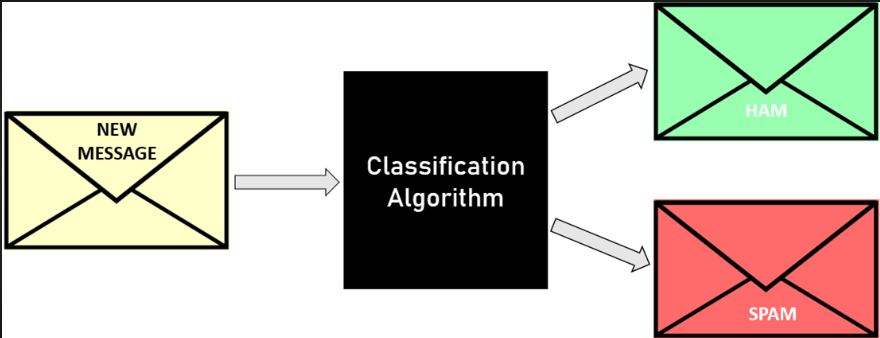**

---



There are 2 columns

column 1:category(sapm or ham)

column 2:text


In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df=df.rename(columns={'v1':'category','v2':'text'})

df.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**DATA PREPROCESSING **

In [ ]:
print('Total rows:',len(df))

Total rows: 5572


In [ ]:
df.isnull()

,category,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


There are totally 5527 rows and 2 columns

In [ ]:
df.shape

(5572, 2)

size() decribe the total of rows * columns

In [ ]:
df.size

11144

In [ ]:
df.columns

Index(['category', 'text'], dtype='object')

In [ ]:
df.dtypes

category    object
text        object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe(include='all')

,category,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.nunique()

category       2
text        5169
dtype: int64

In [ ]:
df.isnull().sum()

category    0
text        0
dtype: int64

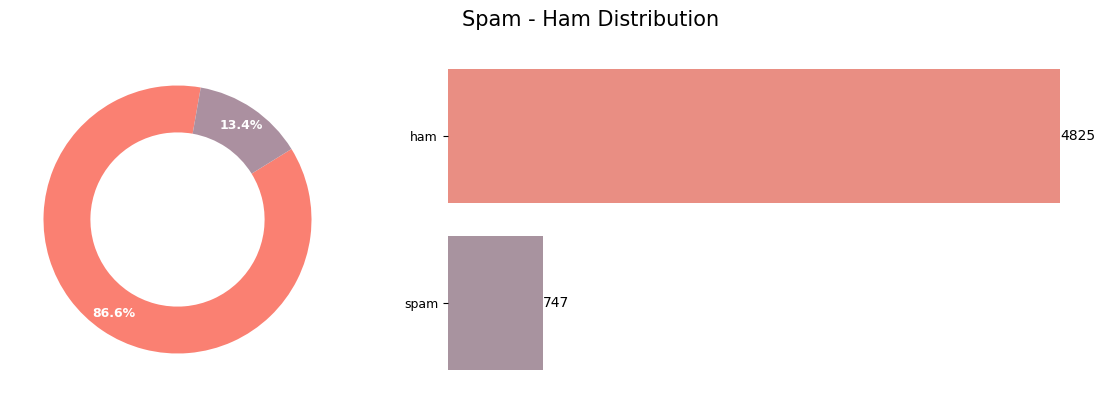

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax = ax.flatten()
value_counts = df['category'].value_counts()
labels = value_counts.index.tolist()
colors =["#fa8072", "#ab90a0" ]
# Donut Chart
wedges, texts, autotexts = ax[0].pie(
    value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
    wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
# circle
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
ax[0].add_artist(centre_circle)
sns.countplot(data=df, y=df['category'], ax=ax[1], palette=colors, order=labels)
for i, v in enumerate(value_counts):
    ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
sns.despine(left=True, bottom=True)
plt.yticks(fontsize=9,color='black')
ax[1].set_ylabel(None)
plt.xlabel("")
plt.xticks([])
fig.suptitle('Spam - Ham Distribution', fontsize=15)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


In [ ]:
df['length']=df['text'].apply(len)
display(df.head())

,category,text,Length,index count,length
0,ham,"Go until jurong point, crazy.. Available only ...",111,111,111
1,ham,Ok lar... Joking wif u oni...,29,29,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,155
3,ham,U dun say so early hor... U c already then say...,49,49,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,61,61


In [ ]:
df=df.drop(['index count','Length'],axis=1)
df.head()

,category,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import plotly.express as px
fig = px.histogram(df, x='length',marginal='rug',
                   title='Histogram of Text Length')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

In [ ]:
import plotly.express as px
fig = px.histogram(df, x='length', color='category', marginal='rug',
                   title='Histogram of Text Length by Category')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

In [ ]:
#Let's Label the data as 0 & 1 i.e. Spam as 1 & Ham as 0
df.loc[:,'category']=df.category.map({'ham':0, 'spam':1})
df['category'] = df['category'].astype(int)
df.head()

,category,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
text = count.fit_transform(df['text'])
#Train & test split
x_train, x_test, y_train, y_test = train_test_split(text, df['category'], test_size=0.5, random_state=100)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [ ]:
print(x_train.shape)
print(x_test.shape)

(2786, 8672)
(2786, 8672)


TRAIN A MODEL using neural network

In [ ]:
#Using multilayer perceptron which is one of neural network
from sklearn.neural_network import MLPClassifier

mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_classifier_model.fit(x_train, y_train)

prediction = mlp_classifier_model.predict(x_test)

# Calculate and print classification metrics
print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, prediction)))
print("Recall score: {:.2f}".format(recall_score(y_test, prediction)))
print("F1 score: {:.2f}".format(f1_score(y_test, prediction)))

MLP Classifier
Accuracy score: 0.98
Precision score: 0.99
Recall score: 0.86
F1 score: 0.92


In [ ]:
from sklearn.naive_bayes import MultinomialNB

multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(x_train, y_train)  # Train the model

prediction = multinomial_nb_model.predict(x_test)

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.9773869346733668
Precision score: 0.9205479452054794
Recall score: 0.9081081081081082
F1 score: 0.9142857142857143


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(x_train, y_train)

prediction = bernoulli_nb_model.predict(x_test)

#Evaluation
print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Bernoulli NB
Accuracy score: 0.9694903086862886
Precision score: 0.9930795847750865
Recall score: 0.7756756756756756
F1 score: 0.8710166919575114


In [ ]:
user_input = input("Enter the text to classify: ")


# 2. Vectorize Input using the same CountVectorizer used during training
vectorized_input = count.transform([user_input])

# 3. Make Prediction
prediction = bernoulli_nb_model.predict(vectorized_input)

# Map prediction to label
if prediction == 0:
    predicted_label = 'ham'
else:
    predicted_label = 'spam'

print("Predicted label:", predicted_label)


Enter the text to classify: congratuation!WINNER
Predicted label: ham
